18 October 2023

https://carmengg.github.io/eds-220-book/lectures/lesson-7-time-series.html

# Time Series

## `pd.Timestamp`

`pandas` represents an instant in time using the `pandas.Timestamp` class

In [1]:
import pandas as pd

# create a timestamp
pd.Timestamp(year=2020, month=10, day=18, hour=12, minute=30, second=15)

Timestamp('2020-10-18 12:30:15')

When we store multiple Timestamps in a `pd.Series `(for example when we have a column of dates) the data type of the column is set to `datetime64[ns]`

In [2]:
# Notice the dtype of the column is datetime64
pd.Series([pd.Timestamp(2020,10,18), 
           pd.Timestamp(2020,10,17),
           pd.Timestamp(2020,10,16)])

0   2020-10-18
1   2020-10-17
2   2020-10-16
dtype: datetime64[ns]

## Data: Precipitation in Boulder, CO

- **STATION**: identification number indentifying the station.
- **STATION_NAME**: optional field, name identifying the station location.
- **DATE**: this is the year of the record (4 digits), followed by month (2 digits), followed by day of the month (2 digits), followed by a space and ending with a time of observation that is a two digit indication of the local time hour, followed by a colon (:) followed by a two digit indication of the minute which for this dataset will always be 00. Note: The subsequent data value will be for the hour ending at the time specified here. Hour 00:00 will be listed as the first hour of each date, however since this data is by definition an accumulation of the previous 60 minutes, it actually occurred on the previous day.
- **HPCP**: The amount of precipitation recorded at the station for the hour ending at the time specified for DATE above given in inches. The values 999.99 means the data value is missing. Hours with no precipitation are not shown.

In [3]:
# read in data 
url = 'https://raw.githubusercontent.com/carmengg/eds-220-book/main/data/boulder_colorado_2013_hourly_precipitation.csv'
precip = pd.read_csv(url)

# check df's head
precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,999.99,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.00,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.00,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.00,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.00,,q


<AxesSubplot:>

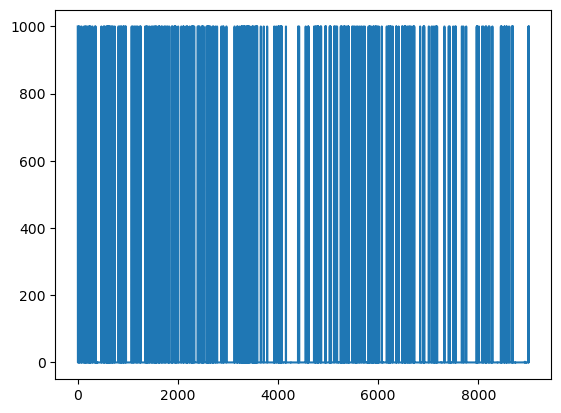

In [4]:
precip.HPCP.plot()

- There are many jumps close to 1000. This is clearly not right and these are outliers. Looking at the column description we can see 999.99 indicates the HPCP data is missing.

- The x-axis values are given by the index of the dataframe and not relative to time.

- We are only intersted in the precipitation data from 2013, this graph is trying to plot all our data.

### Indicate missing data

To indicate missing dara, we add the na_values parameter to the pd.read_csv() function to indicitate additional values that should be recognized as NA

In [5]:
# read in csv indicating NA values
precip = pd.read_csv(url, na_values=[999.99])

# check updated df
precip.head()

,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,20000101 00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,20000101 01:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,20000102 20:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,20000103 01:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,20000103 05:00,0.0,,q


<AxesSubplot:>

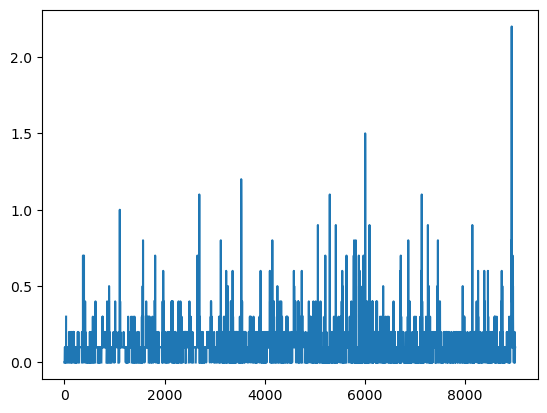

In [6]:
precip.HPCP.plot()

### Strings into Dates

Notice that the DATE column in our dataframe is not of type `datetime`. We can check this using the `dtypes` attribute for dataframes

In [7]:
# check the dtypes of all columns
precip.dtypes

STATION              object
STATION_NAME         object
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

- `pd.to_datetime()` input: a `pd.Series` with strings that can be converted to dates
- `pd.to_datetime()` output: a `pd.Series` with the strings converted to `datetime` objects

In [8]:
# covert precip.DATE column to timedate objects
pd.to_datetime(precip.DATE)

0      2000-01-01 00:00:00
1      2000-01-01 01:00:00
2      2000-01-02 20:00:00
3      2000-01-03 01:00:00
4      2000-01-03 05:00:00
               ...        
9001   2013-12-22 01:00:00
9002   2013-12-23 00:00:00
9003   2013-12-23 02:00:00
9004   2013-12-29 01:00:00
9005   2013-12-31 00:00:00
Name: DATE, Length: 9006, dtype: datetime64[ns]

In [9]:
# convert DATE column from string to datetime
precip.DATE = pd.to_datetime(precip.DATE)

# check column data type is updated
print(precip.dtypes)

# check new values
precip.head()

STATION                     object
STATION_NAME                object
DATE                datetime64[ns]
HPCP                       float64
Measurement Flag            object
Quality Flag                object
dtype: object


,STATION,STATION_NAME,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:055881,NEDERLAND 5 NNW CO US,2000-01-01 00:00:00,NaN,],
1,COOP:055881,NEDERLAND 5 NNW CO US,2000-01-01 01:00:00,0.0,g,
2,COOP:055881,NEDERLAND 5 NNW CO US,2000-01-02 20:00:00,0.0,,q
3,COOP:055881,NEDERLAND 5 NNW CO US,2000-01-03 01:00:00,0.0,,q
4,COOP:055881,NEDERLAND 5 NNW CO US,2000-01-03 05:00:00,0.0,,q


<AxesSubplot:xlabel='DATE'>

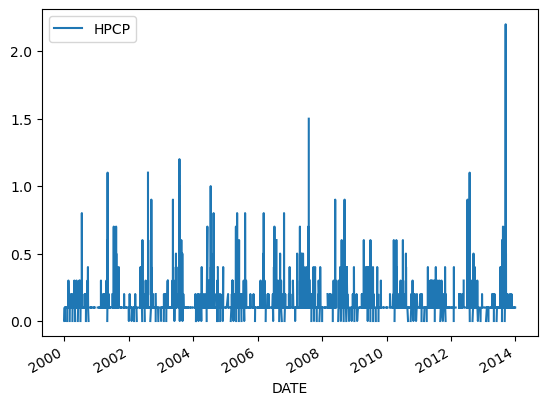

In [10]:
precip.plot(x='DATE', y='HPCP')

### Timestamp Index

Using our DATE column as the index will allows us to do many operations with respect to time, including subsetting and resampling.

Updating the index of a dataframe is simple, we use the `set_index()` method

In [12]:
# set DATE coumn as index
precip = precip.set_index('DATE')

# check new index
precip.head()

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2000-01-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2000-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2000-01-02 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q
2000-01-03 05:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,,q


<AxesSubplot:xlabel='DATE'>

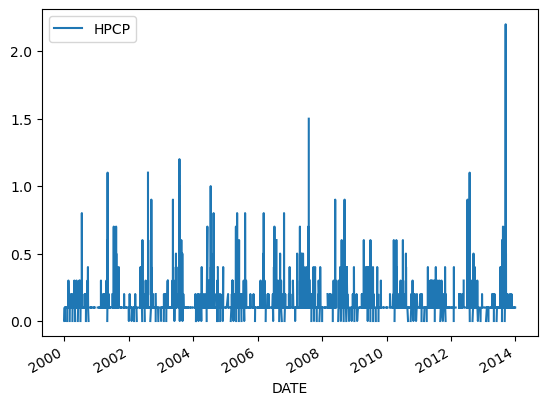

In [13]:
precip.plot()

### Subsetting By Date

In [14]:
# select data from a given month and year
# use loc['year-month']
precip.loc['2013-09']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-09-01 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-09-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-09-01 00:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,],
2013-09-01 01:00:00,COOP:050183,ALLENSPARK 2 SE CO US,NaN,[,
2013-09-01 00:00:00,COOP:055121,LONGMONT 6 NW CO US,NaN,},
...,...,...,...,...,...
2013-09-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.2,,
2013-09-27 10:00:00,COOP:050843,BOULDER 2 CO US,0.1,,
2013-09-27 15:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


In [15]:
# select data from a given year
# use loc['year']
precip.loc['2013']

,STATION,STATION_NAME,HPCP,Measurement Flag,Quality Flag
DATE,,,,,
2013-01-01 01:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.0,g,
2013-01-10 02:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,[,
2013-01-13 00:00:00,COOP:055881,NEDERLAND 5 NNW CO US,NaN,],
2013-01-26 20:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
2013-01-28 23:00:00,COOP:055881,NEDERLAND 5 NNW CO US,0.1,,
...,...,...,...,...,...
2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,NaN,[,
2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,NaN,],
2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,0.1,,


<AxesSubplot:xlabel='DATE'>

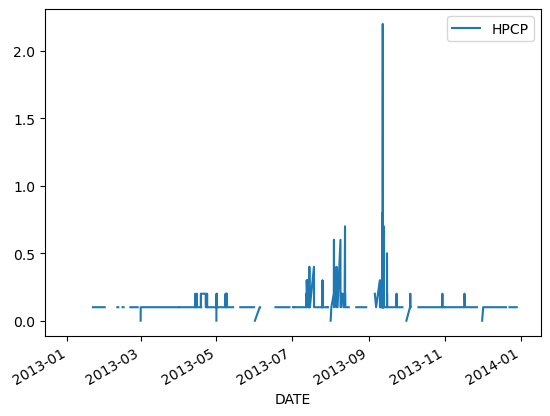

In [16]:
precip.loc['2013'].plot()

### Resampling

Resampling a time series means converting a time series from one frequency to another. For example, monthly to yearly (downsampling) or weekly to daily (upsampling). We can resample with the resample() method. 

```
df.resample(new_frequency).aggregator_function()
```

- `new_frequency` is a string representing the new frequence to resample the data, for example 'D' for day, w for week, M for month, Y for year, and - `aggregator_function()` is the function we will use to aggregate the data into the new frequence. For example, `max()`, `min()`, `sum()` or `average()`.

- `resample()` works similarly to `groupby()` in the sense that you need to specify a way to aggregate the data to get any output.

In [17]:
# resample 2013 hourly data to daily frequency
# nothing happens
precip.loc['2013'].resample('D')

To get an output we need to add an aggregator function that indicates how we want to summarize the data that falls on each day. In this case we want the total precipitation on a day, so we will aggreagte using `sum()`

In [18]:
# total daily precipitation in 2013
daily_precip_2013 = precip.loc['2013'].resample('D').sum()

daily_precip_2013

,HPCP
DATE,
2013-01-01,0.0
2013-01-02,0.0
2013-01-03,0.0
2013-01-04,0.0
2013-01-05,0.0
...,...
2013-12-27,0.0
2013-12-28,0.1
2013-12-29,0.0


<AxesSubplot:title={'center':'Precipitation in Boulder, CO during 2013'}, ylabel='Daily Precipitation (in)'>

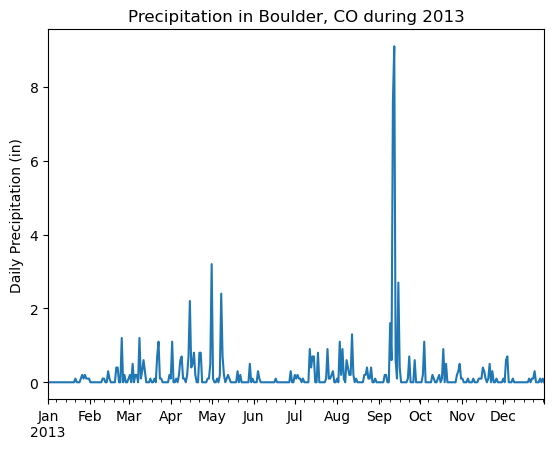

In [21]:
# rename column
daily_precip_2013 = daily_precip_2013.rename(columns={'HPCP':'daily_precipitation'})

daily_precip_2013.plot(ylabel='Daily Precipitation (in)', 
                       xlabel='',
                       title='Precipitation in Boulder, CO during 2013',
                       legend=False)